# Tratamento dos dados

In [34]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('ML_Houses_dataset.csv')

In [36]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      309
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 85, dtype: int64

In [37]:
df = df.drop_duplicates()

In [38]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Pesos,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.011985,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.082336,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.353092,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.263381,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.790667,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.075969,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.521046,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.506378,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.473881,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
Pesos,-0.011985,-0.082336,0.353092,0.263381,0.790667,-0.075969,0.521046,0.506378,0.473881,1.000000,...,0.328885,0.316700,-0.126932,0.045875,0.115218,0.093810,-0.020752,0.048788,-0.029665,1.000000


In [39]:
X = df[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']]

In [40]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(X)

X = r_scaler.transform(X)

X

array([[-0.19047619, -0.25407609,  0.5       , ...,  1.18072289,
         0.        ,  0.52941176],
       [ 0.52380952,  0.03001482,  0.        , ...,  0.        ,
         1.77380952, -0.36764706],
       [-0.04761905,  0.43762352,  0.5       , ...,  0.97590361,
         0.        ,  0.25      ],
       ...,
       [-0.14285714, -0.10783103,  0.5       , ...,  0.        ,
         0.        ,  0.51470588],
       [-0.04761905,  0.05891798, -0.5       , ...,  0.        ,
         2.17857143, -0.36764706],
       [ 0.28571429,  0.11326581, -0.5       , ...,  0.        ,
         4.38095238,  0.63235294]])

In [41]:
y = df['SalePrice']

In [42]:
imputer = KNNImputer(n_neighbors=2, weights='distance')

In [43]:
imputer.fit(X)

KNNImputer(n_neighbors=2, weights='distance')

In [44]:
Xtrans = imputer.transform(X)

In [45]:
X_columns = df[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF']]

In [46]:
X = pd.DataFrame(Xtrans, columns=X_columns.columns)

In [47]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,WoodDeckSF,OpenPorchSF
0,-0.190476,-0.254076,0.5,0.652174,0.243243,1.180723,0.000000,0.529412
1,0.523810,0.030015,0.0,0.065217,-0.486486,0.000000,1.773810,-0.367647
2,-0.047619,0.437624,0.5,0.608696,0.216216,0.975904,0.000000,0.250000
3,-0.428571,0.017663,0.5,-1.260870,-0.648649,0.000000,0.000000,0.147059
4,0.714286,1.181201,1.0,0.586957,0.162162,2.108434,1.142857,0.867647
...,...,...,...,...,...,...,...,...
1455,-0.333333,-0.385746,0.0,0.565217,0.162162,0.000000,0.000000,0.220588
1456,0.761905,0.913167,0.0,0.108696,-0.162162,0.716867,2.077381,-0.367647
1457,-0.142857,-0.107831,0.5,-0.695652,0.324324,0.000000,0.000000,0.514706
1458,-0.047619,0.058918,-0.5,-0.500000,0.054054,0.000000,2.178571,-0.367647


In [48]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

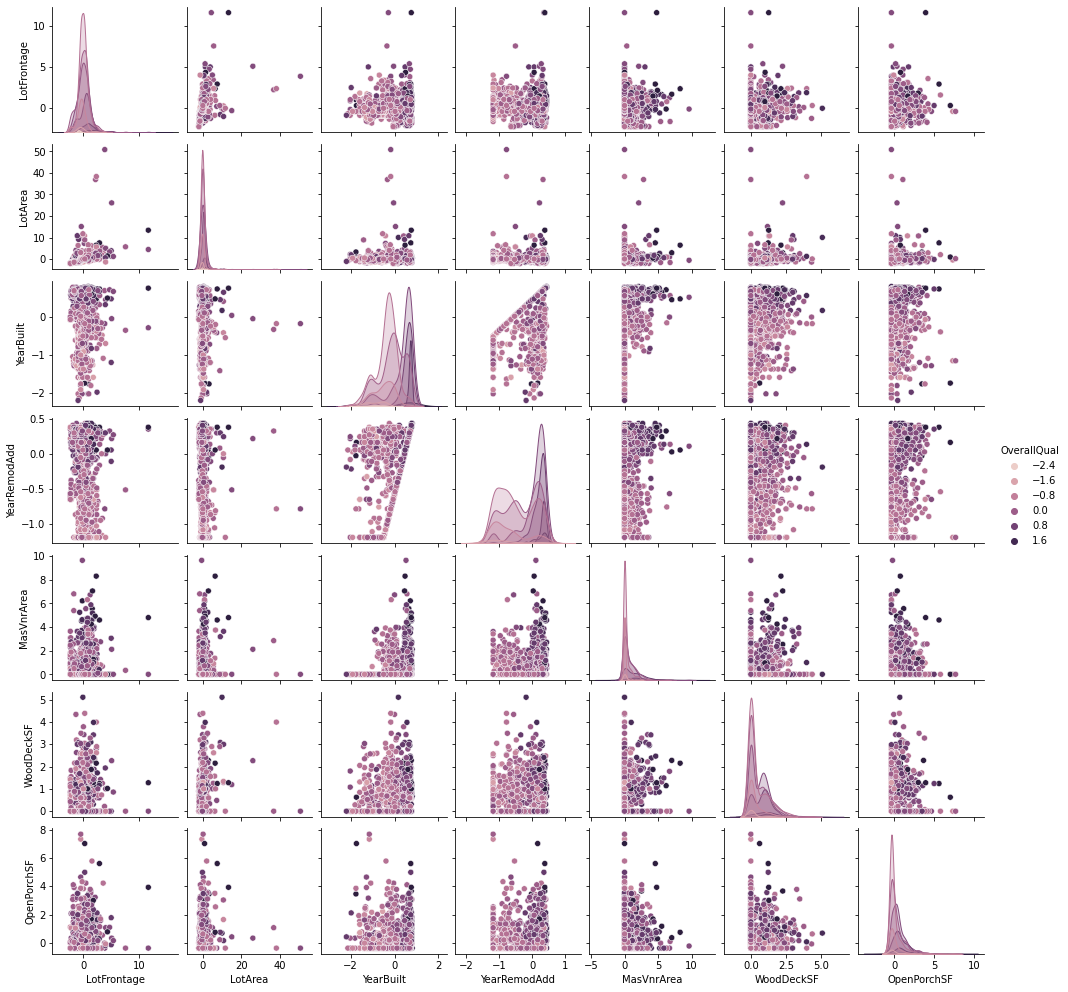

In [49]:
sns.pairplot(X, height=2, hue="OverallQual"); # OverallQual é a coluna com maior correlação com o target, preço.

# Prevendo o valor das casas com Linear Regression

In [50]:
linreg = LinearRegression().fit(X, y)

In [51]:
linreg.score(X, y)

0.7161992113526283

In [52]:
from sklearn.model_selection import cross_validate

cv = cross_validate(linreg, X, y, cv=5)

cv['test_score']

array([0.750756  , 0.71410519, 0.71727701, 0.71468071, 0.64365101])

In [53]:
X.shape

(1460, 8)

In [54]:
y.shape

(1460,)

# Prevendo o valor das casas com Deep Learning LSTM

                            Matando formiga com bazuca

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

In [63]:
model = Sequential()

model.add(LSTM(units=10, activation='linear', input_shape=(8,1)))
model.add(layers.Dense(7, activation="linear"))


model.compile(loss='mae', 
              optimizer='adam')

model.fit(X_train, y_train,
         batch_size=16,
         epochs=1000, verbose=1, callbacks=[es], validation_data=(X_val, y_val))

Epoch 1/1000
64/64 [==============================] - 2s 11ms/step - loss: 181139.0000 - val_loss: 180412.1250
Epoch 2/1000
64/64 [==============================] - 1s 8ms/step - loss: 181121.0156 - val_loss: 180265.3281
Epoch 3/1000
64/64 [==============================] - 0s 7ms/step - loss: 176373.0625 - val_loss: 161630.6094
Epoch 4/1000
64/64 [==============================] - 0s 7ms/step - loss: 126300.2500 - val_loss: 105124.6406
Epoch 5/1000
64/64 [==============================] - 0s 7ms/step - loss: 94302.1484 - val_loss: 80599.3828
Epoch 6/1000
64/64 [==============================] - 0s 8ms/step - loss: 73907.9688 - val_loss: 65242.9258
Epoch 7/1000
64/64 [==============================] - 0s 7ms/step - loss: 61012.8750 - val_loss: 55394.9688
Epoch 8/1000
64/64 [==============================] - 0s 7ms/step - loss: 54438.8242 - val_loss: 52574.3945
Epoch 9/1000
64/64 [==============================] - 0s 7ms/step - loss: 51618.8516 - val_loss: 52123.5859
Epoch 10/1000
64/64

64/64 [==============================] - 0s 7ms/step - loss: 33837.5547 - val_loss: 35568.7812
Epoch 77/1000
64/64 [==============================] - 0s 7ms/step - loss: 34325.1641 - val_loss: 35913.2812
Epoch 78/1000
64/64 [==============================] - 0s 8ms/step - loss: 34016.0234 - val_loss: 34731.8438
Epoch 79/1000
64/64 [==============================] - 1s 8ms/step - loss: 32869.8828 - val_loss: 34221.7422
Epoch 80/1000
64/64 [==============================] - 0s 7ms/step - loss: 31995.9043 - val_loss: 33098.5625
Epoch 81/1000
64/64 [==============================] - 0s 7ms/step - loss: 31757.9648 - val_loss: 32599.8496
Epoch 82/1000
64/64 [==============================] - 0s 7ms/step - loss: 30716.5801 - val_loss: 33095.7539
Epoch 83/1000
64/64 [==============================] - 0s 7ms/step - loss: 32103.4883 - val_loss: 34537.3555
Epoch 84/1000
64/64 [==============================] - 0s 7ms/step - loss: 32308.7461 - val_loss: 33384.0742
Epoch 85/1000
64/64 [============

In [66]:
pred = model.predict(X_val)

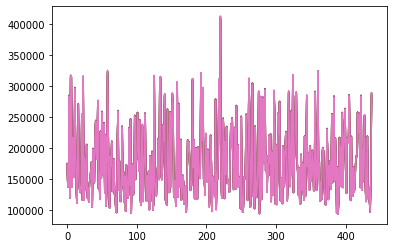

In [67]:
plt.plot(pred);

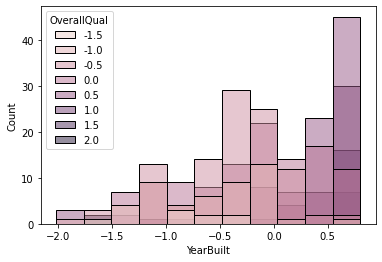

In [68]:
sns.histplot(x="YearBuilt", data=X_val, hue="OverallQual", legend=True);

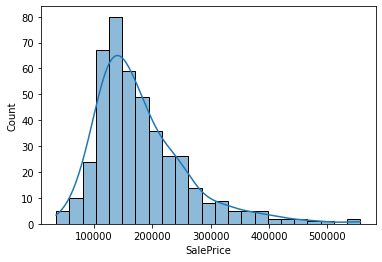

In [69]:
sns.histplot(y_val, kde=True);

In [73]:
df.to_csv('prevendo-valor-casas.csv')